## Lab 2 - Probability and Statistics
### Student Name: Aagnay Kariyal
### Student ID: 8830232

## Part A

***

### Preprocessing
- Load the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [2]:
dataset = pd.read_csv('/Users/aagnaykariyal/Documents/Github/Conestoga/Fall2023/practical_labs/datasets/Lab_2/Lab2_dataset.csv')

* We use a CountVectorizer function from sklearn to transform the "text" feature into a vector representation

In [3]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(dataset['text']).toarray()
y = vectorizer.fit_transform(dataset['label']).toarray()
print(x.shape, y.shape)
#From printing out the shape of x and y, we can see that y gives us two columns and we only need one. So we can drop one column.
y = np.delete(y, 0, 1)
# The ones that are spam would be 1 and the one's that are not labelled as spam would be 0

(5171, 50447) (5171, 2)


* Here we split the dataset into testing and training data

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Model training and evaluation

***


### Standard Naive Bayes
* For the standard naive bayes method we use the bernoulli naive bayes method and save the accuracy score to a score variable

In [5]:
# Standard Naive Bayes
snb = BernoulliNB()
snb.fit(x_train, y_train)
score = snb.score(x_test, y_test)

/Users/aagnaykariyal/Documents/Github/Conestoga/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Gaussian Naive Bayes

* Here we use the Gaussian Naive Bayes method and store the accuracy score to a gnb_score variable

In [6]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_score = gnb.score(x_test, y_test)

/Users/aagnaykariyal/Documents/Github/Conestoga/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Multinomial Naive Bayes
* Here we use the Multinomial Naive Bayes method and store the accuracy score to a mnb_score variable.

In [7]:
# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_score = mnb.score(x_test, y_test)

/Users/aagnaykariyal/Documents/Github/Conestoga/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* Now we print and compare the results

In [8]:
print(f"The Accuracy of the Standard or Bernoulli Naive Bayes model is: {score}\n")
print(f"The accuracy of the Gaussian Naive Bayes model is: {gnb_score}\n")
print(f"The accuracy of the Multinomial Naive Bayes model is {mnb_score}")

The Accuracy of the Standard or Bernoulli Naive Bayes model is: 0.8570048309178744

The accuracy of the Gaussian Naive Bayes model is: 0.9632850241545894

The accuracy of the Multinomial Naive Bayes model is 0.9768115942028985


## Conclusion

*** 

From the above data we can see that the Multinomial Naive Bayes has had the highest score, followed by Gaussian and then the Bernoulli. 
Multinomial NB had the highest score becasue it is mostly used for text classification which helps us in the classification of spam emails in this case.

### Part B

***

* First we load the dataset

In [9]:
dataset_to_clean = pd.read_csv('/Users/aagnaykariyal/Documents/Github/Conestoga/Fall2023/practical_labs/datasets/Lab_2/AB_NYC_2019.csv')
dataset_to_clean.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


* Then we check for outliers by visualizing it using a box plot

<Axes: xlabel='room_type', ylabel='price'>

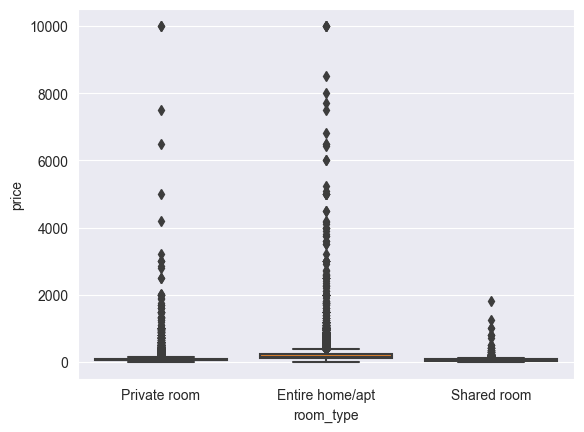

In [10]:
sns.boxplot(x="room_type", y="price", data=dataset_to_clean)

From the above box plot, it is evident that we have a lot of outliers.
The first method that we are gonna try to remove the outliers is by removing all the values that are beneath the left whisker and above the right whisker.
We then get the values of Q1 and Q3 quartiles per room type and then remove all the values that are beneath the left whisker and above the right whisker per room type category.

***

### For Private Room

* Here we calculate the 1st quartile and the 3rd quartile
* Then we calculate the Interquartile Range (IQR)
* We then figure out what our Left Whiskers and Right Whiskers are and then create a dataframe which consists of values between them
* Then we print out a box plot to visualize our results.

<Axes: xlabel='room_type', ylabel='price'>

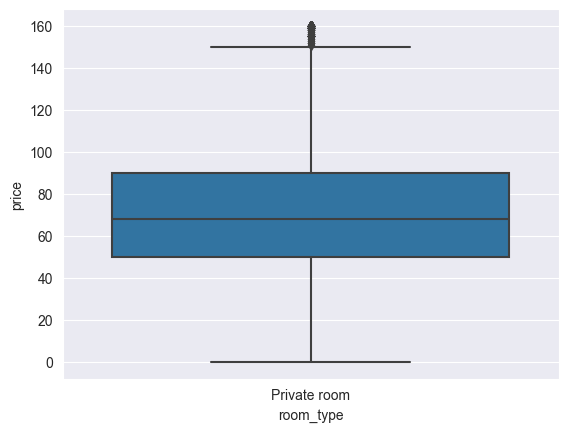

In [11]:
# Private Room
## Calculating the 1st and 3rd quartile
PR_Q1 = dataset_to_clean.loc[dataset_to_clean['room_type']=='Private room', 'price'].quantile(0.25)
PR_Q3 = dataset_to_clean.loc[dataset_to_clean['room_type']=='Private room', 'price'].quantile(0.75)
## Interquartile Range
PR_IQR = PR_Q3 - PR_Q1
## Whiskers
LW_PR = PR_Q1 - (1.5*PR_IQR) ## Left Whisker
RW_PR = PR_Q3 + (1.5*PR_IQR) ## Right Whisker
# Creating a new dataframe which consists of values between the left and right whisker
pr_df = dataset_to_clean[dataset_to_clean['room_type']=='Private room']
pr_df1 = pr_df[(pr_df['price']>LW_PR) & (pr_df['price']<RW_PR)]
# Displaying the boxplot
sns.boxplot(data=pr_df1, x='room_type', y='price')

***

### For Entire home/apt

* Here we calculate the 1st quartile and the 3rd quartile
* Then we calculate the Interquartile Range (IQR)
* We then figure out what our Left Whiskers and Right Whiskers are and then create a dataframe which consists of values between them
* Then we print out a box plot to visualize our results.

<Axes: xlabel='room_type', ylabel='price'>

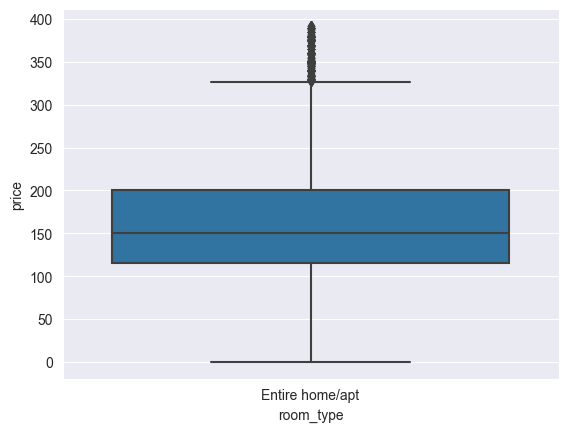

In [12]:
# Entire home/apt
## Calculating the 1st and 3rd quartile
HA_Q1 = dataset_to_clean.loc[dataset_to_clean['room_type']=='Entire home/apt', 'price'].quantile(0.25)
HA_Q3 = dataset_to_clean.loc[dataset_to_clean['room_type']=='Entire home/apt', 'price'].quantile(0.75)
## Interquartile Range
HA_IQR = HA_Q3 - HA_Q1
## Whiskers
LW_HA = HA_Q1 - (1.5*HA_IQR) ## Left Whisker
RW_HA = HA_Q3 + (1.5*HA_IQR) ## Right Whisker 
# Creating a new dataframe which consists of values between the left and right whisker
ha_df = dataset_to_clean[dataset_to_clean['room_type']=='Entire home/apt']
ha_df1 = ha_df[(ha_df['price']>LW_HA) & (ha_df['price']<RW_HA)]
# Displaying the boxplot
sns.boxplot(data=ha_df1, x='room_type', y='price')

***

### For Shared Room

* Here we calculate the 1st quartile and the 3rd quartile
* Then we calculate the Interquartile Range (IQR)
* We then figure out what our Left Whiskers and Right Whiskers are and then create a dataframe which consists of values between them
* Then we print out a box plot to visualize our results.

<Axes: xlabel='room_type', ylabel='price'>

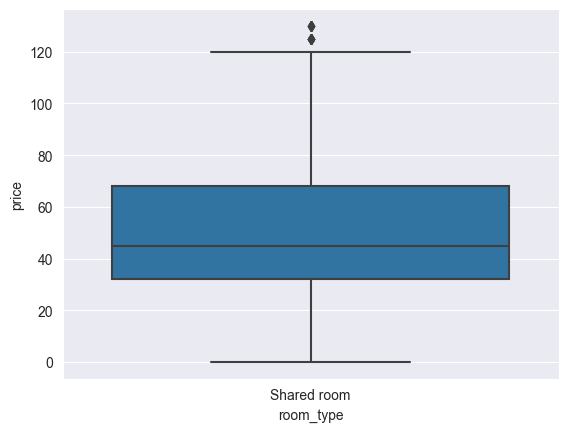

In [13]:
# Shared Room
## Calculating the 1st and 3rd quartile
SR_Q1 = dataset_to_clean.loc[dataset_to_clean['room_type']=='Shared room', 'price'].quantile(0.25)
SR_Q3 = dataset_to_clean.loc[dataset_to_clean['room_type']=='Shared room', 'price'].quantile(0.75)
## Interquartile Range
SR_IQR = SR_Q3 - SR_Q1
## Whiskers
LW_SR = SR_Q1 - (1.5*SR_IQR) ## Left Whisker
RW_SR = SR_Q3 + (1.5*SR_IQR) ## Right Whisker
# Creating a new dataframe which consists of values between the left and right whisker
sr_df = dataset_to_clean[dataset_to_clean['room_type']=='Shared room']
sr_df1 = sr_df[(sr_df['price']>LW_SR) & (sr_df['price']<RW_SR)]
# Displaying the boxplot
sns.boxplot(data=sr_df1, x='room_type', y='price')

As you can see most of the outliers from the initial box plot has now been removed.

***

Now we can try a different method to remove outliers by comparing it with the z-score

* First we find the mean and the standard deviation to calculate the z-score
* Then we subtract the mean from the value and divide it by the standard deviation to get the z-score
* After finding the z-score we plot a box plot according to each room type to look for outliers

***

### Calculating the Z-Score for Private Room

/var/folders/h6/5m4gzhp15gl394vgtm1x4wgr0000gn/T/ipykernel_23874/3903880844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_df['z_score'] = (pr_df['price'] - pr_mean)/pr_std


<Axes: xlabel='room_type', ylabel='price'>

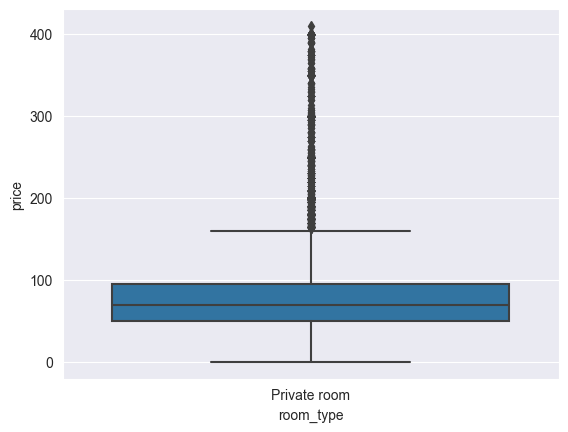

In [14]:
pr_mean = pr_df['price'].mean() # Finding the mean
pr_std = pr_df['price'].std() # Finding the standard deviation
# Creating a new dataframe
pr_df['z_score'] = (pr_df['price'] - pr_mean)/pr_std
pr_cleaned = pr_df[(pr_df['z_score']> -2) & (pr_df['z_score']<2)]
# Displaying the boxplot
sns.boxplot(data=pr_cleaned, x="room_type", y='price')

***

### Calculating the Z-Score for Entire home/apt

/var/folders/h6/5m4gzhp15gl394vgtm1x4wgr0000gn/T/ipykernel_23874/1755795541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ha_df['z_score'] = (ha_df['price'] - ha_mean)/ha_std


<Axes: xlabel='room_type', ylabel='price'>

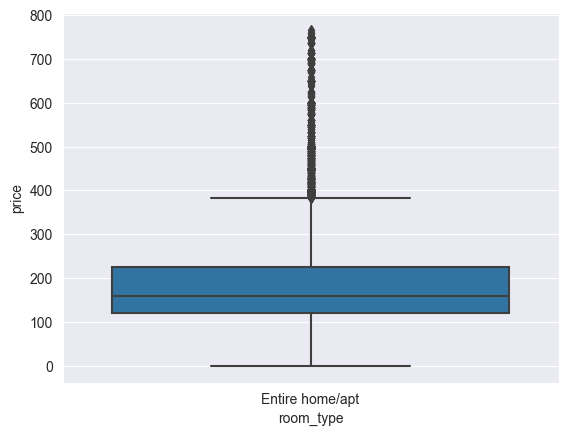

In [15]:
ha_mean = ha_df['price'].mean() # Finding the mean
ha_std = ha_df['price'].std() # Finding the standard deviation
# Creating a new dataframe
ha_df['z_score'] = (ha_df['price'] - ha_mean)/ha_std
ha_cleaned = ha_df[(ha_df['z_score']> -2) & (ha_df['z_score']<2)]
# Displaying the boxplot
sns.boxplot(data=ha_cleaned, x="room_type", y='price')

***

### Calculating the Z-Score for Shared Rooms

/var/folders/h6/5m4gzhp15gl394vgtm1x4wgr0000gn/T/ipykernel_23874/4089599083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sr_df['z_score'] = (sr_df['price'] - sr_mean)/sr_std


<Axes: xlabel='room_type', ylabel='price'>

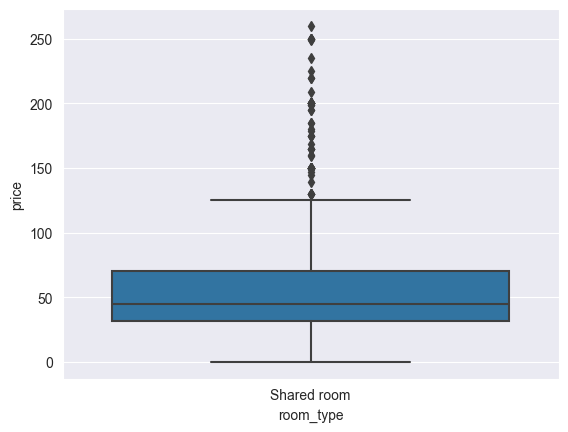

In [16]:
sr_mean = sr_df['price'].mean() # Finding the mean
sr_std = sr_df['price'].std() # Finding the standard deviation
# Creating a new dataframe
sr_df['z_score'] = (sr_df['price'] - sr_mean)/sr_std
sr_cleaned = sr_df[(sr_df['z_score']> -2) & (sr_df['z_score']<2)]
# Displaying the boxplot
sns.boxplot(data=sr_cleaned, x="room_type", y='price')

## Conclusion

***

From the above box-plots it's clear that using the Z-score to remove the outliers is not the better way to remove outliers since all the outliers have not been removed. 

From this we can conclude that comparing z-score elimination to removing outliers based on percentiles and quantiles, finding the z-score is not the better option to remove outliers.